# Final Project Submission

* Student name: Mohammed Siddiqui
* Student pace: Full Time
* Scheduled project review date/time: February 17th, 2021, 1pm EST
* Instructor name: Victor Geislinger

## Library Imports and Visuals Setup


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Styling for visuals
sns.set_style("whitegrid")
%matplotlib inline

## 1. Import Data
1. Budgets and box office receipts from The Numbers (tn.movie_budgets.csv)
2. Basic title information and ratings from IMDB (title.basics.csv, title.ratings.csv)
3. Consumer Price Index Data for inflation adjustment from https://fred.stlouisfed.org/ (CPIAUCNS.csv)

In [2]:
#The Numbers
df_fin = pd.read_csv("./data/tn.movie_budgets.csv")

#IMDB
df_title =pd.read_csv('./data/title.basics.csv')
df_ratings =pd.read_csv('./data/title.ratings.csv')

#CPI
df_CPI =pd.read_csv('./data/CPIAUCNS.csv')

## 2. Cursory Look

In [3]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Notes on df_fin

* release_date should be in datetime
* movie should be a string
* last three columns should be integers

In [4]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Notes on IMDB dataframes

* We can merge the two using the tconst column
* Make sure primary_title is a string, drop original_title
* genres column needs to separate the <= 3 genres


In [6]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      372 non-null    object 
 1   CPIAUCNS  372 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


Note on df_CPI

* Downloaded from https://fred.stlouisfed.org/series/CPIAUCNS

## 3. Data Clean Up

### Inflation Data
1. Convert object in DATE column to format datetime
2. Keep only the Year and Month since that's all we need.
3. Make a Multiplier column for adjustments
    >Formula is to take the CPI for the last month(12-2020) and divide by the CPI in each individual row
    

In [7]:
# Format DATE
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

# Make Multiplier
df_CPI['Multiplier'] = df_CPI['CPIAUCNS'].iloc[-1] / df_CPI['CPIAUCNS']


In [8]:
df_CPI.tail()

,DATE,CPIAUCNS,Multiplier
367,2020-08,259.918,1.002139
368,2020-09,260.280,1.000745
369,2020-10,260.388,1.000330
370,2020-11,260.229,1.000941
371,2020-12,260.474,1.000000


We'll be adjusting for inflation so that everything matches the prices in December 2020

### Financial Data
1. Convert the budget and gross numbers to integers
2. Format dates
    1. Convert everything to datetime
    2. Make separate columns for year w/ month, year, and month
3. Convert 'movie' column to strings and individual 'year' and 'month' columns to integers.


In [9]:
#Function to change strings into integers

def dollar_to_int(column):
    df_fin[column] = df_fin[column].str.replace(',', '')
    df_fin[column] = df_fin[column].str.replace('$', '')
    df_fin[column] = df_fin[column].astype(np.int64)
    return df_fin

In [10]:
# Apply the function
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


There is some missing data that needs to be dealt with.  We will need to determine if the data from those movies is relevant.

In [11]:
#Format dates
df_fin['formatted_date'] = pd.to_datetime(df_fin['release_date'], format='%b %d, %Y')
df_fin['year_month'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y-%m'))
df_fin['year'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y'))
df_fin['month'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%m'))

#Set column to usable data types
df_fin['movie'] = df_fin['movie'].astype(str)
df_fin['year'] = df_fin['year'].astype(np.int64)
df_fin['month'] = df_fin['month'].astype(np.int64)


* Adding "year_month" column from df_fin in order to match up with DATE column in df_CPI
* We'll use those for the merge

In [12]:
#Add inflation data
df_fin = pd.merge(df_fin, df_CPI,left_on='year_month', right_on='DATE', how='left')

In [13]:
df_fin.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,year_month,year,month,DATE,CPIAUCNS,Multiplier
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12-18,2009-12,2009,12,2009-12,215.949,1.206183
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,2011-05,2011,5,2011-05,225.964,1.152723
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019-06-07,2019-06,2019,6,2019-06,256.143,1.016909
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,2015-05,2015,5,2015-05,237.805,1.095326
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,2017-12,2017,12,2017-12,246.524,1.056587


### Adjust for Inflation

1. Use the 'Multiplier' to adjust the 'production_budget', 'domestic_gross', and 'worldwide_gross'
2. Add a column for foreign adjusted gross.
    1. This is simply subracting the domestic gross from the worldwide gross

In [14]:
#Adjust budget, domestic gross and worldwide gross
df_fin['budget_adj'] = df_fin['production_budget'] * df_fin['Multiplier']
df_fin['domestic_adj'] =df_fin['domestic_gross'] * df_fin['Multiplier']
df_fin['worldwide_adj'] =df_fin['worldwide_gross'] * df_fin['Multiplier']

#Add column for foreign gross
df_fin['foreign_adj'] = df_fin['worldwide_adj'] - df_fin['domestic_adj']

### Filtering our movies we don't need.

*  The movies with the missing financial data.  
    * Since there no alternate sources for budget, this is necessary.
*  We want to work with movies with a budget higher than $15 Million.
    * As a company, we don't want to make movies with very small budgets because public perception will be a failure even if the movie is profitable.  Prestige for the Microsoft brand is important here.
*   Keep movies from 2009 until the end of 2018.
    * Having a decade of data seems clean
    * The data from 2019 stops around May, so it's missing most major releases
    

In [15]:
#Filtering
df_fin= df_fin[df_fin['domestic_adj'] != 0]
df_fin= df_fin[df_fin['worldwide_adj'] != 0]
df_fin= df_fin[df_fin['budget_adj'] >= 15000000]
df_fin= df_fin[df_fin['year'] >= 2009]
df_fin= df_fin[df_fin['year'] < 2019]

### Return on Investment and Profit

In order to use the financial data to predict our studio revenues, we can't take the gross values since we don't get all that money.  I will assume that we, as a studio, receive 50% of the domestic gross and 30% of the foreign gross.  These numbers are not exact, but they should give a better representation than box office gross numbers.

* The Studio take will take 50% of the domestic gross and 30% of the foreign gross
* Return on Investment formula: (Studio Take - Budget)/ Budget   
* Profit formula: Studio Take - Budget

In [16]:
#Return on investment and profit calculations added to data frame
df_fin['ROI'] =((((df_fin['domestic_adj']*0.5 +df_fin['foreign_adj']*0.3)-df_fin['budget_adj'])
                    /df_fin['budget_adj'])
                    *100)
df_fin['profit'] =((df_fin['domestic_adj']*0.5 +df_fin['foreign_adj']*0.3)-df_fin['budget_adj'])

In [17]:
df_fin.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,year_month,year,month,DATE,CPIAUCNS,Multiplier,budget_adj,domestic_adj,worldwide_adj,foreign_adj,ROI,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12-18,2009-12,2009,12,2009-12,215.949,1.206183,5.126278e+08,9.173113e+08,3.348780e+09,2.431469e+09,131.765908,6.754686e+08
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,2011-05,2011,5,2011-05,225.964,1.152723,4.733082e+08,2.778800e+08,1.205361e+09,9.274813e+08,-11.857784,-5.612387e+07
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,2015-05,2015,5,2015-05,237.805,1.095326,3.621148e+08,5.027611e+08,1.536758e+09,1.033997e+09,55.083292,1.994647e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,2017-12,2017,12,2017-12,246.524,1.056587,3.349380e+08,6.552755e+08,1.391231e+09,7.359553e+08,63.739054,2.134863e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015-12-18,2015-12,2015,12,2015-12,236.525,1.101254,3.369836e+08,1.031503e+09,2.261216e+09,1.229714e+09,162.524775,5.476818e+08


The above dataframa has gotten pretty big, so we'll only keep columns that we'll be using later on.

In [18]:
#Keep only needed columns
df_fin =df_fin[['movie', 'year', 'month', 'budget_adj', 
                'domestic_adj', 'foreign_adj', 'worldwide_adj', 
                'ROI', 'profit']]

In [19]:
df_fin.head()

,movie,year,month,budget_adj,domestic_adj,foreign_adj,worldwide_adj,ROI,profit
0,Avatar,2009,12,5.126278e+08,9.173113e+08,2.431469e+09,3.348780e+09,131.765908,6.754686e+08
1,Pirates of the Caribbean: On Stranger Tides,2011,5,4.733082e+08,2.778800e+08,9.274813e+08,1.205361e+09,-11.857784,-5.612387e+07
3,Avengers: Age of Ultron,2015,5,3.621148e+08,5.027611e+08,1.033997e+09,1.536758e+09,55.083292,1.994647e+08
4,Star Wars Ep. VIII: The Last Jedi,2017,12,3.349380e+08,6.552755e+08,7.359553e+08,1.391231e+09,63.739054,2.134863e+08
5,Star Wars Ep. VII: The Force Awakens,2015,12,3.369836e+08,1.031503e+09,1.229714e+09,2.261216e+09,162.524775,5.476818e+08


### IMDB data


Our plan is to make movies that reach audiences.  Even box office bombs get a great deal people rating them. As such, any movie with less than 1000 ratings is not relevant to our analysis.

Other specifics will be comments within cells

In [20]:
df_ratings =df_ratings[df_ratings['numvotes'] > 1000]

In [21]:
# Setting the indexes for the upcoming merge of all IMDB data
df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)

In [22]:
# Merging the two IMDB dataframes into one
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')

# Some fields in the genres column have no values, so we'll put in a string value
df_imdb['genres'][df_imdb['genres'].isnull()] = 'Unavailable'

In [23]:
# Merging the financial data with the IMDB data
df_all = pd.merge(df_imdb, df_fin,left_on='primary_title', right_on='movie', how='inner')

# Dropping columns that we no longer need
df_all.drop(['original_title', 'averagerating', 'numvotes', 'start_year'], axis=1, inplace= True)

In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 969
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    970 non-null    object 
 1   runtime_minutes  970 non-null    float64
 2   genres           970 non-null    object 
 3   movie            970 non-null    object 
 4   year             970 non-null    int64  
 5   month            970 non-null    int64  
 6   budget_adj       970 non-null    float64
 7   domestic_adj     970 non-null    float64
 8   foreign_adj      970 non-null    float64
 9   worldwide_adj    970 non-null    float64
 10  ROI              970 non-null    float64
 11  profit           970 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 98.5+ KB


At this point, we are down to ony 970 movies.  There are a two main reasons for this.

1. Most of movies dropped have been because of the filtering process where we removed movies that were not relevant to our analysis.
2. When we merged the financial data with the IMDB data, the only way to match them up was by their titles.  Some movies were incidentally dropped when there were formatting issues.
    * The best way to fix this issue is to find one source that provides both the financial data as well as the general details of the movies.
    *  Our best bet would be to purchase more complete data from The Numbers.

### Working with the genres

The way that IMDB has formatted Genres requires us to do some work before we can use it for any sort of analysis.

The first step is to split each cell so that the (up to 3) genres are separated.  Then, we place each on their own column.  This requires us to make three columns for genres at this point.

In [25]:
triplet_genre = df_all.genres.str.split(",", expand=True)
df_all['genre_1']=triplet_genre[0]
df_all['genre_2']=triplet_genre[1]
df_all['genre_3']=triplet_genre[2]


Next, we turn each of the genres into series so that we can concactate them.

In [26]:
gen_1 =pd.Series(df_all['ROI'].values, df_all['genre_1'])
gen_2 =pd.Series(df_all['ROI'].values, df_all['genre_2'])
gen_3 =pd.Series(df_all['ROI'].values, df_all['genre_3'])
df_gp =pd.DataFrame(pd.concat([gen_1, gen_2, gen_3]))



In [27]:
df_gp.head()

,0
Adventure,-88.247375
Adventure,-25.268437
Action,-14.871025
Action,190.749109
Comedy,-79.810261


The above method seems to have given us an unsual dataframe where the genres are the index.  Let's set it so that both the Genre and Return on Investment are columns.

In [28]:
df_gp.reset_index(inplace=True)
df_gp = df_gp.rename(columns = {'index':'Genre', 0:"ROI"})

In [29]:
df_gp.head()

,Genre,ROI
0,Adventure,-88.247375
1,Adventure,-25.268437
2,Action,-14.871025
3,Action,190.749109
4,Comedy,-79.810261


This, we can work with.

Next, we want a list of the 10 most common genres we have in our dataframe.  

In [30]:

common_genres =df_gp['Genre'].value_counts()[:10].index.tolist()


## 4. Visualizations

Now that we have our data cleaned up, we can use some visualizations to show off what we have.  Because we want to show these to our stakeholders, the visuals should look as simple as possible in order to get our point across.

### Returns by Budget

We'd like to see what the return on investment is as we increase the budget.  A regression model will show this best.  The scatterplot points will be removed because they muddy up what we want to show.  

What we see here is that return on investment looks to increase along with the budget. This indicates that it would be a good idea to allow for higher budgets if a particular project has this need.


<Figure size 1440x720 with 0 Axes>

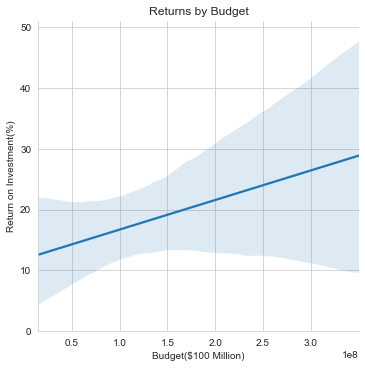

In [31]:
fig = plt.figure(figsize=(20,10))
ax = sns.lmplot(data=df_fin, x='budget_adj', y='ROI', scatter=False)
ax.set(  xlabel='Budget($100 Million)',
         ylabel='Return on Investment(%)', 
         title='Returns by Budget',
         xticks=np.arange(0, 340000000, 50000000), 
         yticks=np.arange(0, 51, 10),  )


plt.xlim([15000000,350000001])
plt.ylim([0,51])
plt.show()

### Analysis by Month

We'll be using bar plots to see which months see the biggest returns as well as which months have the highest budgets.

#### Returns by Month

The confidence intervals have been removed for a cleaner look.

We can observe the following: 

* June, July, November and December have the best returns.
* March, September and October actually have negative returns

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Return on Investment(%)'),
 Text(0.5, 1.0, 'Returns by Month')]

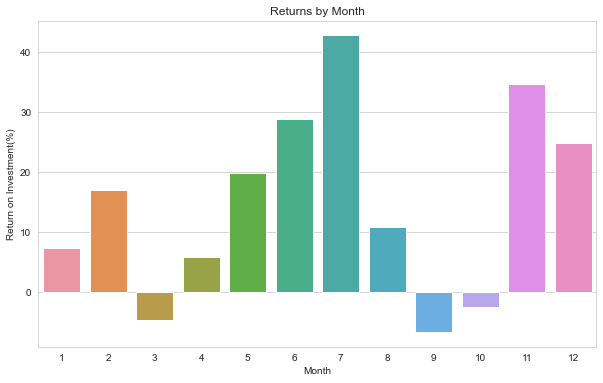

In [32]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_fin, x='month', y='ROI', ci=None)
ax.set( xlabel='Month',
        ylabel='Return on Investment(%)', 
        title='Returns by Month'  )

### Budgets by Month

Here, we want to see if money seems to be spent in the months showing the highest returns.

* Based on the previous chart, we would expect, more money allocated for July when the return on investment is highest, but the most money seems to be spent on movies release in May.
* It might be possible to take advantage of this discrepancy

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Budget($100 Million)'),
 Text(0.5, 1.0, 'Budgets by Month'),

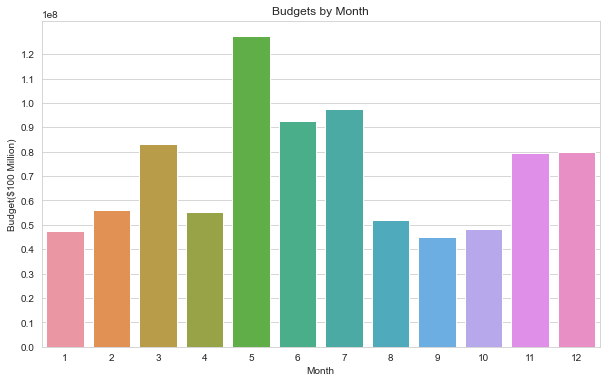

In [33]:
fig =plt.figure(figsize=(10,6))
ax= sns.barplot(data=df_fin, x='month', y='budget_adj', ci=None)
ax.set( xlabel='Month', 
        ylabel='Budget($100 Million)', 
        title='Budgets by Month', 
        yticks=np.arange(0,130000000, 10000000)  )

### Returns by Genre

Again, we use a bar plot in a way that would be simplest to understand.

We can make the following observations:

* The genres of Animation, Sci Fi and Comedy have the highest returns
* Crime movies have negative returns, so they should be avoided

Note on the Animated category: It would be harder to compete here because Disney has a very high market share and an incredibly high resource advantage

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Return on Investment(%)'),
 Text(0.5, 1.0, 'Genre Returns')]

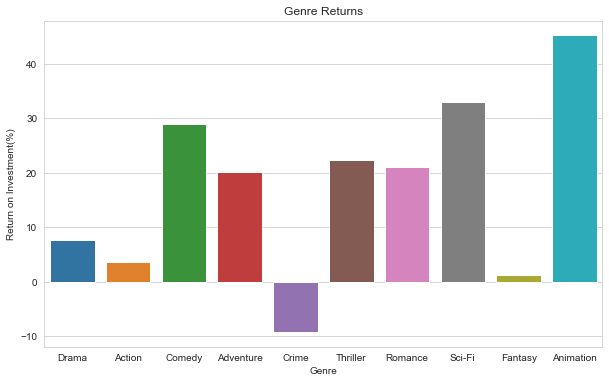

In [34]:
fig = plt.figure(figsize=(10,6))
#plt.figure(figsize=(20,10))

ax = sns.barplot(data=df_gp, x='Genre', y='ROI', order=common_genres, ci=None)
ax.set( xlabel='Genre', 
        ylabel='Return on Investment(%)', 
        title='Genre Returns'  )


### Yearly patterns

* It appears that the average budget has not changed much over the last decade after adjusting for inflation. 
* In contrast, the return on investment seems to fluctuate quite a bit.

<AxesSubplot:xlabel='year', ylabel='budget_adj'>

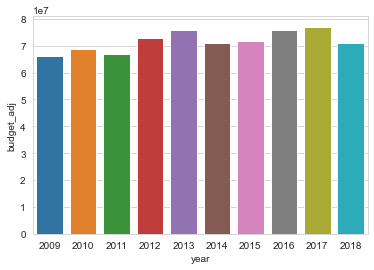

In [35]:
sns.barplot(data=df_fin, x='year', y="budget_adj", ci=False)

<AxesSubplot:xlabel='year', ylabel='ROI'>

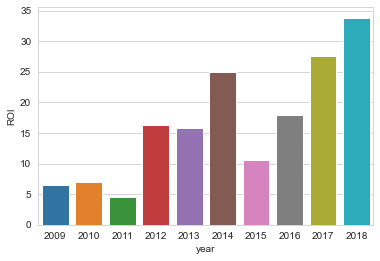

In [36]:
sns.barplot(data=df_fin, x='year', y="ROI", ci=False)